<a href="https://colab.research.google.com/github/Faiyaz-07/Faiyaz_PP02-09/blob/main/Final_Project_(Faiyaz_PP02_09).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import csv
import os
TASKS_FILE = "tasks.csv"
def initialize_tasks_file():
    if not os.path.exists(TASKS_FILE):
        with open(TASKS_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["title", "description", "priority", "deadline", "status", "tags"])

def load_tasks_from_csv():
    tasks = []
    with open(TASKS_FILE, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            tasks.append(row)
    return tasks

def save_task_to_csv(task):
    with open(TASKS_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([task["title"], task["description"], task["priority"], task["deadline"], task["status"], ";".join(task["tags"])])


def save_all_tasks_to_csv(tasks):
    with open(TASKS_FILE, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["title", "description", "priority", "deadline", "status", "tags"])
        for task in tasks:
            writer.writerow([task["title"], task["description"], task["priority"], task["deadline"], task["status"], ";".join(task["tags"])])


In [4]:
def add_task():
    title = input("Enter task title: ")
    description = input("Enter task description: ")
    priority = input("Enter task priority (High/Medium/Low): ")
    deadline = input("Enter task deadline (YYYY-MM-DD, optional): ")
    status = "Pending"
    tags = input("Enter tags (comma-separated, optional): ").split(",") if input("Do you want to add tags? (y/n): ").lower() == "y" else []

    task = {
        "title": title,
        "description": description,
        "priority": priority,
        "deadline": deadline,
        "status": status,
        "tags": tags
    }

    save_task_to_csv(task)
    print(f"Task '{title}' added successfully!")


In [5]:
def view_tasks():
    tasks = load_tasks_from_csv()
    if not tasks:
        print("No tasks found!")
        return

    print(f"{'Title':<20} | {'Priority':<10} | {'Deadline':<12} | {'Status':<10} | {'Tags':<15}")
    print("-" * 80)
    for task in tasks:
        tags = ", ".join(task["tags"].split(";")) if task["tags"] else "None"
        print(f"{task['title']:<20} | {task['priority']:<10} | {task['deadline']:<12} | {task['status']:<10} | {tags:<15}")


In [6]:
def update_task_status():
    tasks = load_tasks_from_csv()
    if not tasks:
        print("No tasks to update!")
        return

    view_tasks()
    title = input("Enter the title of the task to update: ")
    task_found = False
    for task in tasks:
        if task["title"] == title:
            task_found = True
            new_status = input("Enter new status (Pending/In Progress/Completed): ")
            task["status"] = new_status
            save_all_tasks_to_csv(tasks)
            print(f"Task '{title}' updated successfully!")
            break

    if not task_found:
        print("Task not found!")


In [7]:
def main_menu():
    initialize_tasks_file()
    while True:
        print("\nTask Manager")
        print("1. Add Task")
        print("2. View All Tasks")
        print("3. Update Task Status")
        print("4. Exit")

        choice = input("Enter your choice: ")
        if choice == "1":
            add_task()
        elif choice == "2":
            view_tasks()
        elif choice == "3":
            update_task_status()
        elif choice == "4":
            print("Exiting Task Manager. Goodbye!")
            break
        else:
            print("Invalid choice! Please try again.")


In [8]:
import matplotlib.pyplot as plt

def plot_task_distribution_by_status():
    tasks = load_tasks_from_csv()
    if not tasks:
        print("No tasks available for visualization!")
        return

    # Count tasks by status
    statuses = ["Pending", "In Progress", "Completed"]
    counts = [len([t for t in tasks if t["status"] == status]) for status in statuses]

    # Plot the bar chart
    plt.bar(statuses, counts, color=['blue', 'orange', 'green'])
    plt.title("Task Distribution by Status")
    plt.xlabel("Status")
    plt.ylabel("Number of Tasks")
    plt.show()

def plot_task_distribution_by_priority():
    tasks = load_tasks_from_csv()
    if not tasks:
        print("No tasks available for visualization!")
        return
    priorities = ["High", "Medium", "Low"]
    counts = [len([t for t in tasks if t["priority"] == priority]) for priority in priorities]

    plt.bar(priorities, counts, color=['red', 'yellow', 'green'])
    plt.title("Task Distribution by Priority")
    plt.xlabel("Priority")
    plt.ylabel("Number of Tasks")
    plt.show()


In [9]:
def plot_task_distribution_pie():
    tasks = load_tasks_from_csv()
    if not tasks:
        print("No tasks available for visualization!")
        return

    statuses = ["Pending", "In Progress", "Completed"]
    counts = [len([t for t in tasks if t["status"] == status]) for status in statuses]
    plt.pie(counts, labels=statuses, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
    plt.title("Task Distribution by Status")
    plt.show()


In [10]:
def main_menu():
    initialize_tasks_file()
    while True:
        print("\nTask Manager")
        print("1. Add Task")
        print("2. View All Tasks")
        print("3. Update Task Status")
        print("4. Plot Task Distribution by Status")
        print("5. Plot Task Distribution by Priority")
        print("6. Exit")

        choice = input("Enter your choice: ")
        if choice == "1":
            add_task()
        elif choice == "2":
            view_tasks()
        elif choice == "3":
            update_task_status()
        elif choice == "4":
            plot_task_distribution_by_status()
        elif choice == "5":
            plot_task_distribution_by_priority()
        elif choice == "6":
            print("Exiting Task Manager. Goodbye!")
            break
        else:
            print("Invalid choice! Please try again.")



Task Manager
1. Add Task
2. View All Tasks
3. Update Task Status
4. Plot Task Distribution by Status
5. Plot Task Distribution by Priority
6. Exit
Enter your choice: 1
Enter task title: Learning Python
Enter task description: Have to finish course on Python from CourseEra.
Enter task priority (High/Medium/Low): Medium
Enter task deadline (YYYY-MM-DD, optional): 2024-12-30
Do you want to add tags? (y/n): y
Enter tags (comma-separated, optional): Learnn, Program
Task 'Learning Python' added successfully!

Task Manager
1. Add Task
2. View All Tasks
3. Update Task Status
4. Plot Task Distribution by Status
5. Plot Task Distribution by Priority
6. Exit
Enter your choice: 2
Title                | Priority   | Deadline     | Status     | Tags           
--------------------------------------------------------------------------------
Learning Python      | Medium     | 2024-12-30   | Pending    | Learnn,  Program

Task Manager
1. Add Task
2. View All Tasks
3. Update Task Status
4. Plot Task D

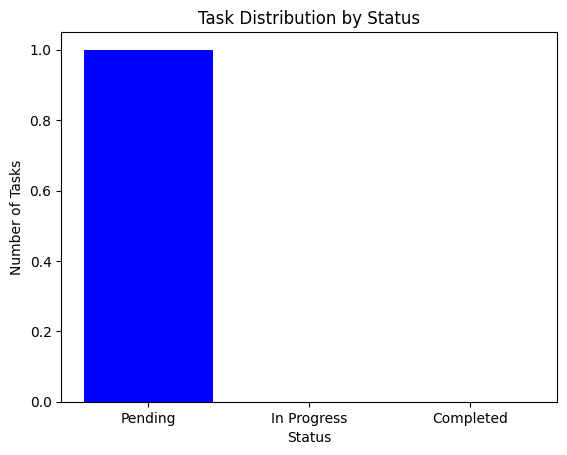


Task Manager
1. Add Task
2. View All Tasks
3. Update Task Status
4. Plot Task Distribution by Status
5. Plot Task Distribution by Priority
6. Exit
Enter your choice: 5


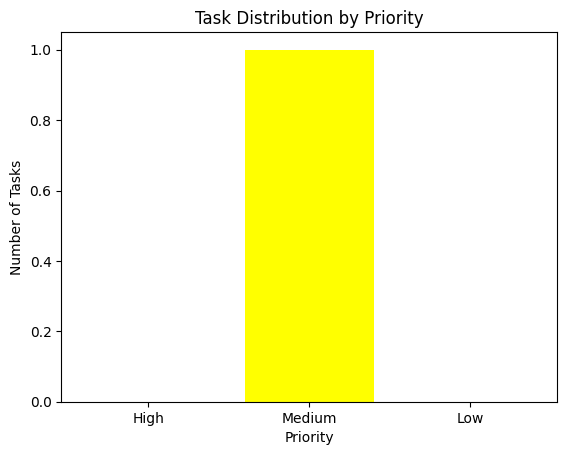


Task Manager
1. Add Task
2. View All Tasks
3. Update Task Status
4. Plot Task Distribution by Status
5. Plot Task Distribution by Priority
6. Exit
Enter your choice: 6
Exiting Task Manager. Goodbye!


In [12]:
if __name__ == "__main__":
    main_menu()